# Installing Spotipy

In [1]:
##!conda install -c conda-forge spotipy

## Loading credentials from the config file

In [2]:
import config

## Starting with Spotify API

In [3]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))



results = sp.search(q="daddy cool",limit=5,market="GB")
results


{'tracks': {'href': 'https://api.spotify.com/v1/search?query=daddy+cool&type=track&market=GB&offset=0&limit=5',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
       'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
       'id': '54R6Y0I7jGUCveDTtI21nb',
       'name': 'Boney M.',
       'type': 'artist',
       'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'},
     'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4',
     'id': '1KQUrny9y5zGpktF6hAGd4',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02dafd1cd6e9537ec8463ea691',
       'width': 300},
      {'height': 64,
       'url': 'https://i.sc

In [5]:
import pprint

In [5]:
pprint.pprint(results["tracks"]["items"][0]["album"]["artists"][0]["name"])

'Boney M.'


In [6]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=daddy+cool&type=track&market=GB&offset=0&limit=5',
 'items': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
      'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
      'id': '54R6Y0I7jGUCveDTtI21nb',
      'name': 'Boney M.',
      'type': 'artist',
      'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'},
    'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4',
    'id': '1KQUrny9y5zGpktF6hAGd4',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02dafd1cd6e9537ec8463ea691',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851d

# Understanding the json

In [7]:
print("The json file has the following keys: ",list(results.keys())) # We can see that we only have tracks
print("The 'tracks' key has the following child keys: ",list(results["tracks"].keys())) # Let's check the values
print("The query we made is: ",results["tracks"]["href"]) # Query we have searched 
print("The song's info is contained in: ",results["tracks"]["items"]) #items (actual tracks)
print("The limit of the query we've made is: ",results["tracks"]["limit"]) #Limit we have chosen
print("The next page if any: ",results["tracks"]["next"]) #link to the next page (next 50 tracks)
print("The starting webpage: ",results["tracks"]["offset"]) # Actual offset (starting point)
print("Starting webpage: ",results["tracks"]["previous"]) #Previous search
print("Total number of results: ",results["tracks"]["total"]) # Number of matches

The json file has the following keys:  ['tracks']
The 'tracks' key has the following child keys:  ['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
The query we made is:  https://api.spotify.com/v1/search?query=daddy+cool&type=track&market=GB&offset=0&limit=5
The song's info is contained in:  [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'}, 'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb', 'id': '54R6Y0I7jGUCveDTtI21nb', 'name': 'Boney M.', 'type': 'artist', 'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'}, 'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4', 'id': '1KQUrny9y5zGpktF6hAGd4', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001

## Other Info

In [8]:
results["tracks"]["items"][0]["artists"] # Track artists
results["tracks"]["items"][0]["id"] # Track ID
results["tracks"]["items"][0]["name"] # Track name
results["tracks"]["items"][0]["popularity"] # Popularity index
results["tracks"]["items"][0]["uri"] # Basically ID

'spotify:track:3WMbD1OyfKuwWDWMNbPQ4g'

In [9]:
len(results['tracks']["items"])

5

## Getting the track_id

In [10]:
track_id=results["tracks"]["items"][0]["id"]
track_id

'3WMbD1OyfKuwWDWMNbPQ4g'

In [11]:
for item in results['tracks']['items']:
    print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))

The name of song is: 'Daddy Cool' and the id is: 3WMbD1OyfKuwWDWMNbPQ4g
The name of song is: 'Daddy Cool' and the id is: 50rcUhHimavzT1qq6QrgMG
The name of song is: 'Daddy Cool - Remix 2001' and the id is: 6AJICOpiJjrI8NKKsNezTk
The name of song is: 'Daddy Cool' and the id is: 6blKbRwYDoXl5fFvQY2U75
The name of song is: 'Daddy Cool - Nick Raider Radio Mix' and the id is: 2TVXrjsGdTCUNqF7ns2I15


## Embeded track player

In [6]:
from IPython.display import IFrame

track_id = '3WMbD1OyfKuwWDWMNbPQ4g'
#track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [13]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [14]:
play_song('3WMbD1OyfKuwWDWMNbPQ4g')

# Getting the Audio features of a song

In [15]:
results["tracks"]["items"][0]["id"]

'3WMbD1OyfKuwWDWMNbPQ4g'

In [16]:
sp.audio_features(results["tracks"]["items"][0]["id"] )[0]

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=3WMbD1OyfKuwWDWMNbPQ4g:
 Max Retries, reason: too many 429 error responses

In [ ]:
## example of bethoven song
sp.audio_features('2TVxnKdb3tqe1nhQWwwZCO')

In [ ]:
play_song('2TVxnKdb3tqe1nhQWwwZCO')

## Building a Data frame of audio features

In [ ]:
sp.audio_features(results["tracks"]["items"][0]["uri"])

In [ ]:
#my_dict = sp.audio_features(song["tracks"]["items"][0]["uri"])[0] # you can provide a list of uri's

list_of_songs=[]
for index in range(0,len(results["tracks"]["items"])):
    list_of_songs.append(sp.audio_features(results["tracks"]["items"][index]["uri"])[0])
df=pd.DataFrame(list_of_songs)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df

## Searching a playlist

In [ ]:
playlist = sp.user_playlist_tracks("spotify", "37i9dQZF1DZ06evO2A96G4",market="GB")

In [ ]:
playlist

In [ ]:
type(playlist)

In [ ]:
playlist.keys()

In [ ]:
playlist["items"][0]

## Extracting a song from playlist

In [ ]:
pprint.pprint(playlist)

In [ ]:
playlist["items"][0]["track"]["id"]

In [ ]:
play_song(playlist["items"][0]["track"]["id"])

In [ ]:
print(list(playlist.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:
len(playlist["items"]) # It is limited to 100 tracks, we will have to fix it:

## Extracting the songs of a playlist

Pagination using "next"
When you collect songs from a playlist using sp.playlist_tracks, you're limited by the limit parameter, which has a maximum (and default) value of 100. When the playlist has more than 100 songs, you have to collect them by navigating through the "pages" of the results.

The parameter offset allows you to retrieve resuls starting at a certain position: if you start at position 101, you'd get the next "page" of results. An offset of 201 would give you the third page, and so on.

The function sp.next() does the same, but in a simpler way: it can be used on the results from any request to directly retrieve the results for the next page.

We can check whether there's a next page or not by accessing the key next on the results from any request.

In [10]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

### Example with Jay Sean

In [ ]:
jay_sean =get_playlist_tracks('spotify','37i9dQZF1DZ06evO2A96G4')

In [ ]:
jay_sean[0].keys()

In [ ]:
jay_sean[0]

In [ ]:
jay_sean_id_list = []
for i in jay_sean:
    jay_sean_id_list.append(i['track']['id'])

In [ ]:
audio_list =[]
for i in jay_sean_id_list:
    audio_list.append(sp.audio_features(i)[0])
audio_list

In [ ]:
jay_sean_df = pd.DataFrame(audio_list)
jay_sean_df

In [ ]:
pprint.pprint(jay_sean)

### Example with rock

In [ ]:
37i9dQZF1DWXRqgorJj26U

In [ ]:
rock = get_playlist_tracks('Spotify','37i9dQZF1DWXRqgorJj26U')

In [ ]:
rock_ids =[]
for i in rock:
    rock_ids.append(i['track']['id'])

In [ ]:
play_song('5EWPGh7jbTNO2wakv8LjUI')

In [ ]:
rock_af = []
for i in rock_ids:
    rock_af.append(sp.audio_features(i)[0])

In [ ]:
pd.DataFrame(rock_af)

## Optional(Extra)

## Getting the artists of the playlist 

In [7]:
def get_artists_from_track(track):
    return [artist["name"] for artist in track["artists"]]

In [8]:
def get_artists_from_playlist(playlist_id):
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    return list(set(artist for subset in [get_artists_from_track(track["track"]) for track in tracks_from_playlist] for artist in subset))

In [11]:
get_artists_from_playlist("4rnleEAOdmFAbRcNCgZMpY")

['',
 'Casso',
 'Ja Rule',
 'Zac Efron',
 'Swizz Beatz',
 'Bronski Beat',
 'blackbear',
 'Chad Kroeger',
 'Pras',
 'Ray Dalton',
 'The Goo Goo Dolls',
 'Ruelle',
 'Ice Cube',
 'City Girls',
 'We The Kings',
 'Trap City',
 'R.E.M.',
 'Sandra Lyng',
 'Pariisin Kevät',
 'Justin Stone',
 'MASN',
 'Dosdela',
 'Lord Finesse,',
 'Mikko Pohjola',
 'Kygo',
 'Tommee Profitt',
 'The Script',
 'Malmö',
 'Kliff',
 'Toro y Moi',
 'Jamie Lynn Spears',
 'Hot Shade',
 'HEDEGAARD',
 'Maiki',
 'The Moose',
 'Chance the Rapper',
 'Teqkoi',
 'Sexmane',
 'Martti Vainaa',
 'Andy Marsh',
 'Dzeko',
 'Ege Zulu',
 'ILLENIUM',
 'Dimitri Vangelis & Wyman',
 'Sugababes',
 'Smith & Thell',
 'Far East Movement',
 'Axwell',
 'Saara Aalto',
 'Eino Antiwäkki',
 'Calboy',
 'Starkillers',
 'Toni Braxton',
 'Mikko Harju',
 'J. Cole',
 'The Flexican',
 'Death Cab for Cutie',
 'Lennon Stella',
 'Madison Love',
 'Kid Ink',
 'Styles P',
 'Versace Henrik',
 'Fasion',
 'A Touch Of Class',
 'Magnace',
 'Eduardo Luzquiños',
 'Lil 

# Getting albums 

In this section we will work with albums to extract information. We will start by extracting all the albums of an artist.

In [ ]:
def get_albums_from_artist(artist_id):
    results = sp.artist_albums(artist_id, limit = 50,country="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Same for albums ids
def get_album_ids_from_artist(artist_id):
    results = sp.artist_albums(artist_id, limit = 50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return [track["id"] for track in tracks]

Example: Coldplay

In [ ]:
coldplay_id = "4gzpq5DPGxSnKTe4SA8HAU"
coldplay_albums = get_albums_from_artist(coldplay_id)
coldplay_album_ids = get_album_ids_from_artist(coldplay_id)

# Check artists that played with coldplay
set([artist["name"] for track in coldplay_albums for artist in track["artists"]])

## Getting the songs of a given album

In [ ]:
def get_track_ids_from_albums(album_ids):
    return list(set([i["id"] for j in album_ids for i in sp.album(j)["tracks"]["items"]]))

In [ ]:
coldplay_songs = get_track_ids_from_albums(coldplay_album_ids)

len(coldplay_songs)

In [ ]:
sublist_length = len(chill_ids) // 4

# Use list slicing to create 4 sub-lists
sublist1 = chill_ids[:sublist_length]
sublist2 = chill_ids[sublist_length:2 * sublist_length]
sublist3 = chill_ids[2 * sublist_length:3 * sublist_length]
sublist4 = chill_ids[3 * sublist_length:]

chill_af = []
for i in sublist1:
    chill_af.append(sp.audio_features(i)[0])
for i in sublist2:
    chill_af.append(sp.audio_features(i)[0])
for i in sublist3:
    chill_af.append(sp.audio_features(i)[0])
for i in sublist4:
    chill_af.append(sp.audio_features(i)[0])

## Play list chill 

In [57]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config
import matplotlib.pyplot as plt

In [11]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [12]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [13]:
chill_p = get_playlist_tracks('Spotify','7j9Zqm9NaApNBmxYiSFUlP')

In [14]:
chill_p

[{'added_at': '2023-11-16T19:23:41Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/yeahthejacko'},
   'href': 'https://api.spotify.com/v1/users/yeahthejacko',
   'id': 'yeahthejacko',
   'type': 'user',
   'uri': 'spotify:user:yeahthejacko'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/27CcPFsy79qUbXjqWSDkjj'},
      'href': 'https://api.spotify.com/v1/artists/27CcPFsy79qUbXjqWSDkjj',
      'id': '27CcPFsy79qUbXjqWSDkjj',
      'name': 'Midnight Dance Party',
      'type': 'artist',
      'uri': 'spotify:artist:27CcPFsy79qUbXjqWSDkjj'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1ZXyz6qwgUbhWMvhUyTGvE'},
    'href': 'https://api.spotify.com/v1/albums/1ZXyz6qwgUbhWMvhUyTGvE',
    'id': '1ZXyz6qwgUbhWMvhUyTGvE',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273e43701452fd6477

In [15]:
chill_ids =[]
for i in chill_p:
    chill_ids.append(i['track']['id'])

In [16]:
chill_af = []
for i in chill_ids:
    chill_af.append(sp.audio_features(i)[0])

In [17]:
df = pd.DataFrame(chill_af)

chunk_size = 100
bp_ids_chopped = [bp_ids[i:i+chunk_size] for i in range(0,len(bp_ids), 100)]
len(bp_ids_chopped)

bp_ids_chopped

In [18]:
df.to_csv("out.csv")

## Playlist 2

In [19]:
chill_p1 = get_playlist_tracks('Spotify','0C67u7PwsOe8fzBfczxlIZ')

chill1_ids =[]
for i in chill_p1:
    chill1_ids.append(i['track']['id'])
    
chill1_af = []
for i in chill1_ids:
    chill1_af.append(sp.audio_features(i)[0])
    
df1 = pd.DataFrame(chill1_af)

In [20]:
dff = pd.concat([df, df1], ignore_index = True)

In [21]:
dff.to_csv("out.csv")

In [22]:
dff

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.618,0.806,7,-5.308,1,0.0317,0.017900,0.776000,0.181,0.222,140.009,audio_features,4YCVbp6suJ2Ayk9EtWQJuR,spotify:track:4YCVbp6suJ2Ayk9EtWQJuR,https://api.spotify.com/v1/tracks/4YCVbp6suJ2A...,https://api.spotify.com/v1/audio-analysis/4YCV...,259849,4
1,0.706,0.863,4,-6.386,0,0.0475,0.013100,0.834000,0.119,0.309,142.007,audio_features,2HhhhHfVEmz09NAb0FxgDW,spotify:track:2HhhhHfVEmz09NAb0FxgDW,https://api.spotify.com/v1/tracks/2HhhhHfVEmz0...,https://api.spotify.com/v1/audio-analysis/2Hhh...,230074,4
2,0.792,0.919,6,-9.028,0,0.0819,0.137000,0.151000,0.274,0.711,128.968,audio_features,5qKuF0NtvWVn5UarAgyli3,spotify:track:5qKuF0NtvWVn5UarAgyli3,https://api.spotify.com/v1/tracks/5qKuF0NtvWVn...,https://api.spotify.com/v1/audio-analysis/5qKu...,186625,4
3,0.684,0.997,8,-5.538,1,0.0579,0.002550,0.779000,0.253,0.514,142.010,audio_features,0lIOamNC6EMXu1AgPyzSTD,spotify:track:0lIOamNC6EMXu1AgPyzSTD,https://api.spotify.com/v1/tracks/0lIOamNC6EMX...,https://api.spotify.com/v1/audio-analysis/0lIO...,299387,4
4,0.594,0.767,5,-3.706,1,0.3710,0.001520,0.000085,0.346,0.717,129.955,audio_features,0LKAbdXTieXQrjuImr9B9u,spotify:track:0LKAbdXTieXQrjuImr9B9u,https://api.spotify.com/v1/tracks/0LKAbdXTieXQ...,https://api.spotify.com/v1/audio-analysis/0LKA...,140538,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.802,0.903,11,-3.267,0,0.0460,0.001100,0.000000,0.173,0.960,128.930,audio_features,02jcEwywffn3Tsb48fXmlW,spotify:track:02jcEwywffn3Tsb48fXmlW,https://api.spotify.com/v1/tracks/02jcEwywffn3...,https://api.spotify.com/v1/audio-analysis/02jc...,192533,4
362,0.414,0.853,11,-4.198,1,0.0453,0.018100,0.001200,0.049,0.624,93.770,audio_features,5huLMzIzFEdVcvEzt2hfk1,spotify:track:5huLMzIzFEdVcvEzt2hfk1,https://api.spotify.com/v1/tracks/5huLMzIzFEdV...,https://api.spotify.com/v1/audio-analysis/5huL...,171693,4
363,0.815,0.605,5,-9.118,0,0.0368,0.033000,0.684000,0.114,0.795,102.642,audio_features,3UBItNVbFQiVC5hBQlBvnr,spotify:track:3UBItNVbFQiVC5hBQlBvnr,https://api.spotify.com/v1/tracks/3UBItNVbFQiV...,https://api.spotify.com/v1/audio-analysis/3UBI...,259893,4
364,0.734,0.735,7,-6.201,1,0.0650,0.000813,0.000032,0.559,0.729,96.806,audio_features,0eO8MW9YSTK3CjdaTYKlhF,spotify:track:0eO8MW9YSTK3CjdaTYKlhF,https://api.spotify.com/v1/tracks/0eO8MW9YSTK3...,https://api.spotify.com/v1/audio-analysis/0eO8...,246200,4


## KNN

In [39]:
data = pd.DataFrame(dff[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

In [43]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.618,0.806,7,-5.308,1,0.0317,0.01790,0.776000,0.181,0.222,140.009
1,0.706,0.863,4,-6.386,0,0.0475,0.01310,0.834000,0.119,0.309,142.007
2,0.792,0.919,6,-9.028,0,0.0819,0.13700,0.151000,0.274,0.711,128.968
3,0.684,0.997,8,-5.538,1,0.0579,0.00255,0.779000,0.253,0.514,142.010
4,0.594,0.767,5,-3.706,1,0.3710,0.00152,0.000085,0.346,0.717,129.955


In [45]:
X = pd.DataFrame(data)

print()
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.618,0.806,7,-5.308,1,0.0317,0.01790,0.776000,0.181,0.222,140.009
1,0.706,0.863,4,-6.386,0,0.0475,0.01310,0.834000,0.119,0.309,142.007
2,0.792,0.919,6,-9.028,0,0.0819,0.13700,0.151000,0.274,0.711,128.968
3,0.684,0.997,8,-5.538,1,0.0579,0.00255,0.779000,0.253,0.514,142.010
4,0.594,0.767,5,-3.706,1,0.3710,0.00152,0.000085,0.346,0.717,129.955


In [46]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.226059,0.185888,0.383430,0.726131,0.800784,-0.469685,-0.572942,1.570963,-0.025259,-1.329359,0.668849
1,0.439351,0.526565,-0.426197,0.296092,-1.248776,-0.290091,-0.599319,1.741006,-0.459945,-0.988846,0.751509
2,1.089638,0.861264,0.113554,-0.757864,-1.248776,0.100925,0.081532,-0.261399,0.626770,0.584559,0.212072
3,0.272998,1.327454,0.653306,0.634379,0.800784,-0.171877,-0.657293,1.579758,0.479538,-0.186488,0.751633
4,-0.407535,-0.047207,-0.156321,1.365207,0.800784,3.387045,-0.662953,-0.703849,1.131567,0.608043,0.252905


In [49]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,-2.912060e-16,7.765494e-17,-5.338777e-17,-1.164824e-16,-8.736181e-17,-1.553099e-16,-4.853434e-17,3.882747e-17,-2.135511e-16,-3.882747e-17,-4.271022e-16
std,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00
min,-2.751592e+00,-4.094685e+00,-1.505700e+00,-4.287540e+00,-1.248776e+00,-5.628920e-01,-6.711658e-01,-7.040972e-01,-1.170867e+00,-2.026824e+00,-2.329638e+00
25%,-6.249271e-01,-6.613214e-01,-9.659485e-01,-4.618630e-01,-1.248776e+00,-4.281963e-01,-6.355186e-01,-7.040869e-01,-6.509967e-01,-7.960845e-01,-8.315735e-01
50%,1.066457e-01,2.695628e-01,1.135543e-01,1.492879e-01,8.007844e-01,-3.094140e-01,-4.611157e-01,-6.927952e-01,-4.248898e-01,1.364127e-01,2.049357e-01
75%,7.096735e-01,7.760953e-01,9.231813e-01,6.259018e-01,8.007844e-01,-1.700505e-02,2.120423e-01,1.002931e+00,4.707740e-01,8.389658e-01,6.663568e-01
max,2.276789e+00,1.327454e+00,1.462933e+00,2.642560e+00,8.007844e-01,9.525076e+00,4.554599e+00,2.042979e+00,4.791344e+00,1.617841e+00,3.230832e+00


In [53]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=10, random_state=1234)

In [54]:
labels = kmeans.labels_
labels

array([2, 6, 5, 2, 1, 5, 6, 6, 1, 5, 0, 2, 6, 6, 6, 5, 6, 6, 2, 6, 0, 5,
       6, 3, 2, 0, 6, 6, 3, 1, 0, 2, 5, 6, 4, 1, 0, 3, 5, 6, 8, 2, 1, 0,
       8, 6, 0, 7, 2, 2, 2, 8, 2, 6, 1, 2, 2, 2, 2, 6, 0, 3, 1, 5, 2, 6,
       6, 5, 8, 4, 2, 5, 7, 2, 6, 6, 0, 6, 2, 6, 7, 1, 2, 2, 2, 6, 6, 6,
       6, 2, 6, 2, 6, 2, 6, 1, 2, 6, 0, 6, 2, 1, 5, 2, 8, 5, 6, 0, 2, 6,
       6, 2, 2, 1, 2, 1, 6, 6, 5, 2, 6, 2, 2, 6, 6, 2, 2, 1, 0, 2, 6, 2,
       6, 2, 8, 1, 2, 1, 6, 8, 1, 6, 7, 5, 1, 2, 5, 1, 6, 6, 6, 4, 2, 2,
       7, 0, 1, 1, 0, 7, 5, 5, 8, 7, 8, 7, 1, 2, 5, 4, 8, 8, 0, 5, 4, 3,
       4, 0, 4, 4, 0, 1, 5, 5, 1, 5, 0, 4, 5, 7, 5, 1, 4, 5, 4, 5, 8, 0,
       3, 4, 5, 0, 7, 3, 4, 1, 1, 8, 7, 1, 4, 4, 0, 1, 4, 8, 8, 8, 3, 5,
       5, 3, 0, 3, 1, 4, 4, 8, 8, 0, 8, 0, 8, 8, 4, 5, 1, 8, 8, 5, 0, 5,
       8, 5, 4, 3, 8, 5, 5, 5, 5, 4, 8, 1, 3, 5, 5, 3, 4, 1, 3, 3, 4, 3,
       3, 4, 8, 5, 3, 5, 0, 8, 4, 5, 4, 8, 8, 6, 5, 8, 7, 1, 5, 5, 8, 8,
       1, 5, 4, 1, 5, 8, 8, 5, 7, 1, 0, 1, 4, 8, 9,

In [55]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

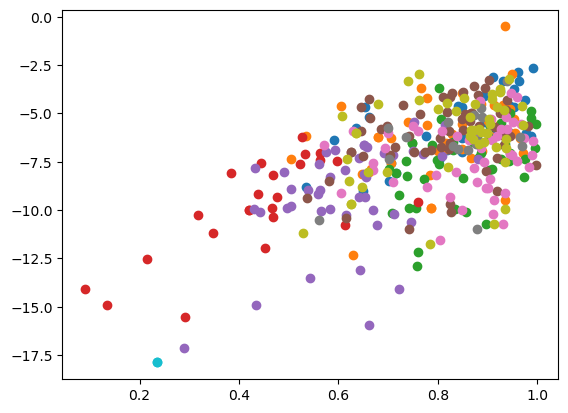

In [60]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [61]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    32
1    43
2    47
3    24
4    45
5    58
6    49
7    17
8    49
9     2
Name: count, dtype: int64

In [62]:
clusters

array([2, 6, 5, 2, 1, 5, 6, 6, 1, 5, 0, 2, 6, 6, 6, 5, 6, 6, 2, 6, 0, 5,
       6, 3, 2, 0, 6, 6, 3, 1, 0, 2, 5, 6, 4, 1, 0, 3, 5, 6, 8, 2, 1, 0,
       8, 6, 0, 7, 2, 2, 2, 8, 2, 6, 1, 2, 2, 2, 2, 6, 0, 3, 1, 5, 2, 6,
       6, 5, 8, 4, 2, 5, 7, 2, 6, 6, 0, 6, 2, 6, 7, 1, 2, 2, 2, 6, 6, 6,
       6, 2, 6, 2, 6, 2, 6, 1, 2, 6, 0, 6, 2, 1, 5, 2, 8, 5, 6, 0, 2, 6,
       6, 2, 2, 1, 2, 1, 6, 6, 5, 2, 6, 2, 2, 6, 6, 2, 2, 1, 0, 2, 6, 2,
       6, 2, 8, 1, 2, 1, 6, 8, 1, 6, 7, 5, 1, 2, 5, 1, 6, 6, 6, 4, 2, 2,
       7, 0, 1, 1, 0, 7, 5, 5, 8, 7, 8, 7, 1, 2, 5, 4, 8, 8, 0, 5, 4, 3,
       4, 0, 4, 4, 0, 1, 5, 5, 1, 5, 0, 4, 5, 7, 5, 1, 4, 5, 4, 5, 8, 0,
       3, 4, 5, 0, 7, 3, 4, 1, 1, 8, 7, 1, 4, 4, 0, 1, 4, 8, 8, 8, 3, 5,
       5, 3, 0, 3, 1, 4, 4, 8, 8, 0, 8, 0, 8, 8, 4, 5, 1, 8, 8, 5, 0, 5,
       8, 5, 4, 3, 8, 5, 5, 5, 5, 4, 8, 1, 3, 5, 5, 3, 4, 1, 3, 3, 4, 3,
       3, 4, 8, 5, 3, 5, 0, 8, 4, 5, 4, 8, 8, 6, 5, 8, 7, 1, 5, 5, 8, 8,
       1, 5, 4, 1, 5, 8, 8, 5, 7, 1, 0, 1, 4, 8, 9,

In [63]:
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.618,0.806,7,-5.308,1,0.0317,0.017900,0.776000,0.181,0.222,140.009,2
1,0.706,0.863,4,-6.386,0,0.0475,0.013100,0.834000,0.119,0.309,142.007,6
2,0.792,0.919,6,-9.028,0,0.0819,0.137000,0.151000,0.274,0.711,128.968,5
3,0.684,0.997,8,-5.538,1,0.0579,0.002550,0.779000,0.253,0.514,142.010,2
4,0.594,0.767,5,-3.706,1,0.3710,0.001520,0.000085,0.346,0.717,129.955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.802,0.903,11,-3.267,0,0.0460,0.001100,0.000000,0.173,0.960,128.930,5
362,0.414,0.853,11,-4.198,1,0.0453,0.018100,0.001200,0.049,0.624,93.770,8
363,0.815,0.605,5,-9.118,0,0.0368,0.033000,0.684000,0.114,0.795,102.642,6
364,0.734,0.735,7,-6.201,1,0.0650,0.000813,0.000032,0.559,0.729,96.806,7


##  Choice of song from Cluster


In [74]:
X[X['cluster'] == 7].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
354,0.513,0.82,7,-5.428,1,0.0299,0.00192,0.000003,0.504,0.52,99.952,7


Training a K-Means model with 2 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 3 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 4 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 5 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 6 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 7 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 8 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 9 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 10 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 11 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 12 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 13 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 14 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 15 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 16 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 17 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 18 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 19 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training a K-Means model with 20 clusters! 



C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\41791\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

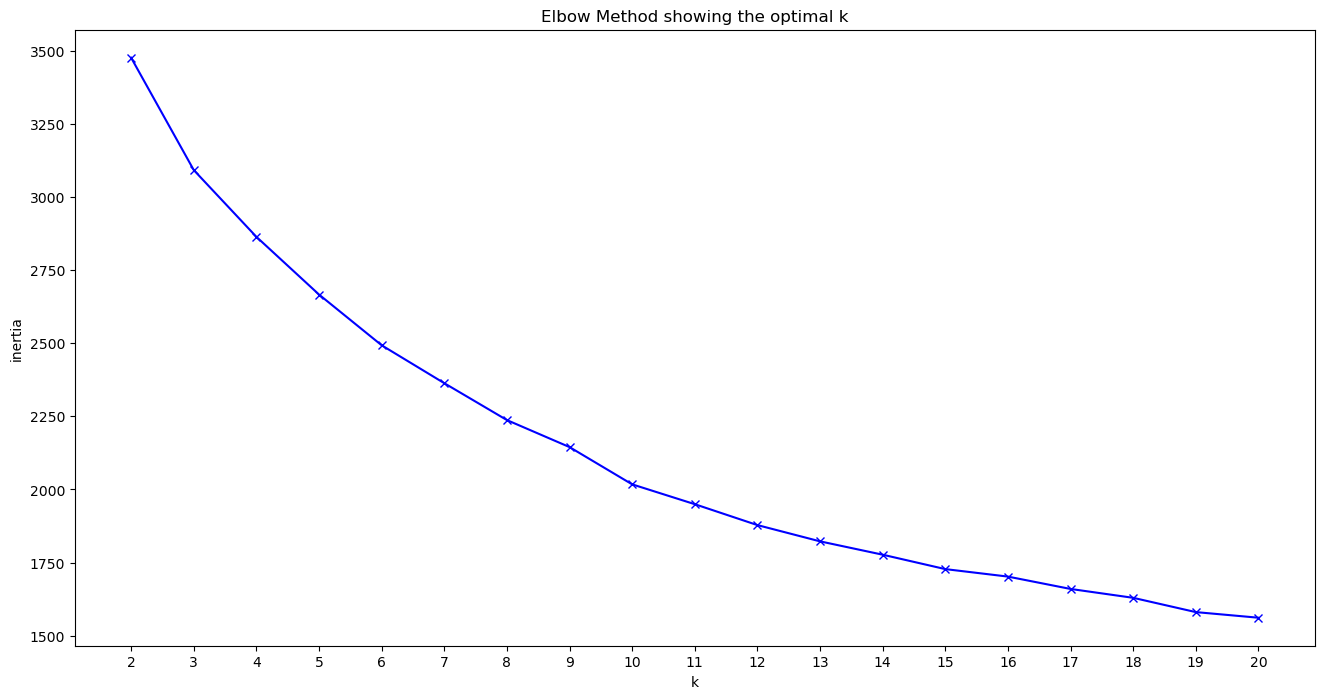

In [75]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')